In [178]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter, ScalarFormatter
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn.objects as so
threads = [1, 2, 4, 8, 16, 32]

df = pd.read_csv("julia_benchmark.csv", skip_blank_lines=True)
names = [
    "Median Assembly Time, GC Time Excluded",
    "Mean Assembly Time, GC Time Included",
    "Median Assembly, GC Time Included",
]
cpp_marker = {"LDC-S": "$S$", "LDC-M": "$M$", "Wind": "$W$"}
case_color = {"LDC-S": 'b', "LDC-M": 'g', "Wind": 'r'}
method_color = {"CellBasedAssembly": 'b', "FaceBasedAssembly": 'g', "BatchedFaceBasedAssembly": 'r'}
ax_mapping = {1: {"incl_gc": False, "metric": "median"},2: {"incl_gc": False, "metric": "mean"}, 3: {"incl_gc": True, "metric": "mean"}, 4: {"incl_gc": True, "metric": "median"}}
x = np.arange(1, 7)
xlabels = [str(t) for t in threads]

ylims = [[0, 1200], [0, 2000], [0, 1200]]


In [ ]:
cases = df["case_short"].unique()
cases_long = df.groupby("case_long")["case_short"].unique()

In [101]:
serial = pd.read_csv("test.csv")
assemblyMethods = serial["algorithm"].unique()
nCells = {"LDC-S": 1030301, "LDC-M": 8120601, "Wind": 6517376}

In [171]:
yticks = [50, 75, 100, 150, 214.5, 300, 750, 1100, 1500, 2100]
ylabels=[f"{y}ms" for y in yticks]


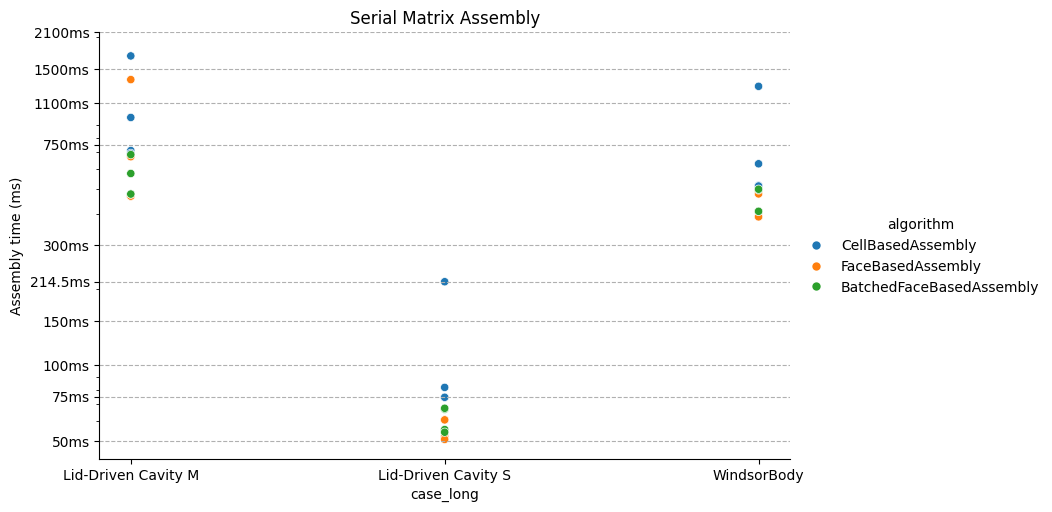

In [ ]:

p = sb.relplot(data=serial, x='case_long', y='time_ms', hue='algorithm', hue_order=assemblyMethods, aspect=1.61)
# so.Plot().add(so.Dodge())
ax = p.axes.flat[0]
ax.set_yscale("log")
ax.set_ylabel("Assembly time")
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.yaxis.grid(True, linestyle="dashed")
ax.set_title("Serial Matrix Assembly")
# plt.suptitle("Serial Matrix Assembly", fontsize=22)
plt.show()

/tmp/ipykernel_97784/1802014424.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_97784/1802014424.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_97784/1802014424.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


AttributeError: 'Axes' object has no attribute 'suptitle'

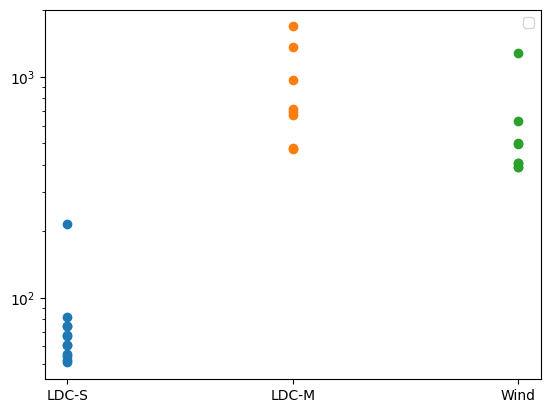

In [ ]:
ax = plt.figure().add_subplot(111)
for method in assemblyMethods:
    method_df = serial.loc[df["algorithm"] == method]
    xticks = np.arange(1,5).tolist()
    xticklabels = cases
    for i, case in enumerate(cases):
        i += 1
        case_data = method_df[method_df["case_short"] == case]
        time = case_data["time_ms"] 
        xloc = np.full(i, len(time))
        ax.scatter(, time ) 
    ax.xaxis.set_ticks(np.arange(1,4), cases)
    ax.set_yscale("log")
    ax.legend()
ax.suptitle("Cell-Based Matrix Assembly", fontsize=22)

    time_ms case_short            case_long  threads algorithm  incl_gc  \
26      943      LDC-M  Lid-Driven Cavity M        1      cell     True   
27      879      LDC-M  Lid-Driven Cavity M        2      cell     True   
28      690      LDC-M  Lid-Driven Cavity M        4      cell     True   
29      638      LDC-M  Lid-Driven Cavity M        8      cell     True   
30      946      LDC-M  Lid-Driven Cavity M       16      cell     True   
31      800      LDC-M  Lid-Driven Cavity M       32      cell     True   

    metric language  
26  median    julia  
27  median    julia  
28  median    julia  
29  median    julia  
30  median    julia  
31  median    julia  
    time_ms case_short            case_long  threads algorithm  incl_gc  \
32     1740      LDC-M  Lid-Driven Cavity M        1      cell     True   
33     1687      LDC-M  Lid-Driven Cavity M        2      cell     True   
34     1102      LDC-M  Lid-Driven Cavity M        4      cell     True   
35     1001      LDC

Text(0.5, 0.98, 'Cell-Based Matrix Assembly')

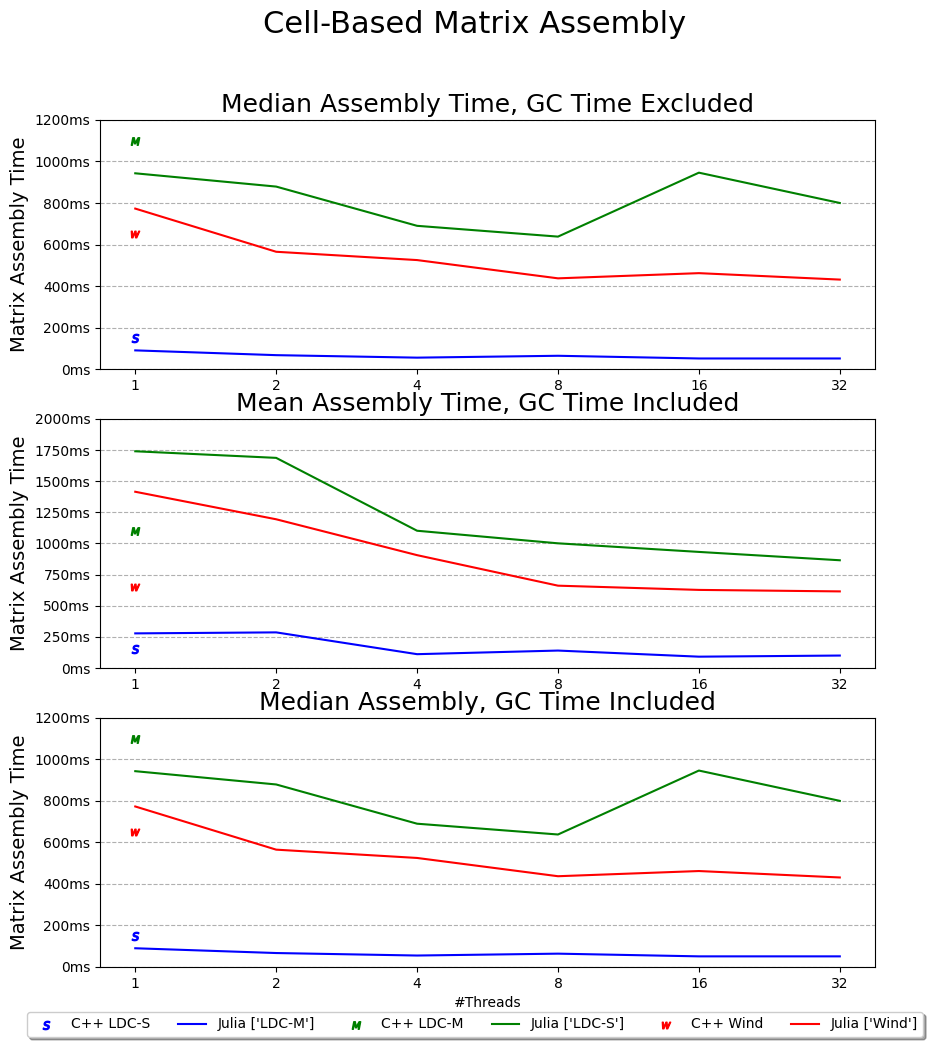

In [ ]:

fig, axes = plt.subplots(4,1, figsize=(10, 11))
for i, ax in enumerate(axes.flat):
    for case,long in zip(cases, cases_long):
        case_df = df[df["case_short"] == case]

        cpp_df = case_df[case_df["language"] == "cpp"]
        marker = cpp_marker[case]
        ax.scatter([1], cpp_df["time_ms"], marker=cpp_marker[case], color=case_color[case], label=f"C++ {case}")

        julia_df = case_df.loc[case_df["language"] == "julia"]
        metric = ax_mapping[i+1]
        metric_df = julia_df.loc[(julia_df["metric"] == metric["metric"]) & (julia_df["metric"] == metric["metric"])].sort_values(by=["threads"])
        if case == "LDC-M":
            print(metric_df)
        ax.plot(x, metric_df["time_ms"], label=f"Julia {long}", c=case_color[case])

    ax.xaxis.set_ticks(np.arange(1,7)) #set the ticks to be a
    ax.xaxis.set_ticklabels(xlabels) # change the ticks' names to x
    if i > 1:
        ax.set_xlabel("#Threads")
    ax.set_ylabel("Matrix Assembly Time", fontsize=14)
    yticks = [int(y) for y in ax.get_yticks()]
    ylabels=[f"{y}ms" for y in yticks]
    ax.yaxis.set_ticks(yticks)
    ax.yaxis.set_ticklabels(ylabels)
    # ax.yaxis.set_ticklabels([f"{y}ms" for y in yticks]) # change the ticks' names to x
    ax.set_title(names[i], fontsize=18)
    ax.set_ylim(ylims[i])
    ax.yaxis.grid(True, linestyle="dashed")
    ax.set_axisbelow(True) # so that markers are drawn on top of the grid
handles, labels = axes[0].get_legend_handles_labels()
plt.subplots_adjust(hspace=0.2)
fig.legend(handles, labels, loc="lower center",bbox_to_anchor=(0.5, 0.04), ncol=6, fancybox=True, shadow=True)
fig.suptitle("Cell-Based Matrix Assembly", fontsize=22)
